# Fisher Linear Discriminant

In this exercise, we apply Fisher Linear Discriminant as described in Chapter 3.8.2 of Duda et al. on the UCI Abalone dataset. A description of the dataset is given at the page https://archive.ics.uci.edu/ml/datasets/Abalone. The following two methods are provided for your convenience: 


* **`utils.Abalone.__init__(self)`** reads the Abalone data and instantiates two data matrices corresponding to: *infant (I)*, *non-infant (N)*.


* **`utils.Abalone.plot(self,w)`** produces a histogram of the data when projected onto a vector `w`, and where each class is shown in a different color.


Sample code that makes use of these two methods is given below. It loads the data, looks at the shape of instantiated matrices, and plots the projection on the first dimension of the data representing the length of the abalone.

(1342, 7) (2835, 7)


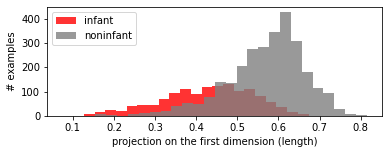

In [2]:
%matplotlib inline
import utils,numpy

# Load the data
abalone = utils.Abalone()

# Print dataset size for each class
print(abalone.I.shape, abalone.N.shape)

# Project data on the first dimension
w1 = numpy.array([1,0,0,0,0,0,0])
abalone.plot(w1,'projection on the first dimension (length)')

## Implementation (10 + 5 + 5 = 20 P)

* **Create a function `w = fisher(X1,X2)` that takes as input the data for two classes and returns the Fisher linear discriminant.**


* **Create a function `objective(X1,X2,w)` that evaluates the objective defined in Equation 96 of Duda et al. for an arbitrary projection vector `w`.**


* **Create a function `z = phi(X)` that returns a quadratic expansion for each data point `x` in the dataset. Such expansion consists of the vector `x` itself, to which we concatenate the vector of all pairwise products between elements of `x`.** In other words, letting $x = (x_1,\dots,x_d)$ denote the $d$-dimensional data point, the quadratic expansion for this data point is a $d \cdot (d+3)/2$ dimensional vector given by $\phi(x) = (x_i)_{1 \leq i \leq d} \cup (x_i x_j)_{1 \leq i \leq j \leq d}$. For example, the quadratic expansion for $d=2$ is $(x_1,x_2,x_1^2,x_2^2,x_1 x_2)$.

In [16]:
def fisher(X1,X2):
    ##### Replace by your code
    mean1 = numpy.mean(X1,axis=0)
    mean2 = numpy.mean(X2,axis=0)
    mean_difference = mean1 - mean2
    
    cov1 = numpy.cov(X1,rowvar=False)
    cov2 = numpy.cov(X2,rowvar=False)
    
    S_b = numpy.dot((mean_difference).T,(mean_difference))
    S_w = cov1 + cov2
    
    #Sadece inv calismaz mi? Pseudonverse almisiz uhm
    w = numpy.linalg.inv(S_w) @ (mean_difference)
    return w
    #####
    
def objective(X1,X2,w):
    ##### Replace by your code
    mean1 = numpy.mean(X1,axis=0)
    mean2 = numpy.mean(X2,axis=0)
    mean_difference = mean1 - mean2
    
    cov1 = numpy.cov(X1,rowvar=False)
    cov2 = numpy.cov(X2,rowvar=False)
    
    S_w = cov1 + cov2
    
    max_mean_class_diff=numpy.dot(w.T,numpy.dot(mean_difference,w))
    
    min_inclass_variance = numpy.dot(w.T, numpy.dot(S_w, w))
    
    return max_mean_class_diff / min_inclass_variance
    #####
def ComputeFisherLinearDiscriminant(X1,X2):
    m1 = numpy.mean(X1,axis=0)
    m2 = numpy.mean(X2,axis=0)
    SW = numpy.cov(X1,rowvar=False) + numpy.cov(X2,rowvar=False)
    inv = numpy.linalg.inv(SW)
    return numpy.dot(inv,m1-m2)
    
def expand(X):
    ##### Replace by your code
    d = X.shape[1]
    size_after_expansion = d*(d+3)/2
    
    result = numpy.zeros(int(size_after_expansion))
    
    for x in X:
        datapoint_exp = x
        for i in range(0,x.size):
            datapoint_exp = numpy.concatenate((datapoint_exp, x[i]*x[i:x.size]))
        result = numpy.vstack((result, datapoint_exp))
    return result[1:]

 #####################
    X1_centered = X1 - u1
    X2_centered = X2 - u2
    sigma1= (X1_centered.T.dot( X1_centered))
    sigma2=  (X2_centered.T.dot( X2_centered))
    S = sigma1 + sigma2
    w =  numpy.linalg.inv(S).dot((u1 - u2))
    return (w/numpy.linalg.norm(w) )



def objective(X1,X2,w):
    u1 = X1.mean(axis=0)  
    u2 = X2.mean(axis=0) 
    delta_u = (u1 - u2).reshape((X1.shape[1],1))
    Sb = delta_u.dot(delta_u.T)
    #####################
    X1_centered = X1 - u1
    X2_centered = X2 - u2
    sigma1= (X1_centered.T.dot( X1_centered))
    sigma2=  (X2_centered.T.dot( X2_centered))
    Sw= sigma1 + sigma2
    #####################
    return w.dot(Sb.dot(w.T))/w.dot(Sw.dot(w.T))


#####
def expand(X):
    d = X.shape[1]
    size_after_expansion = d*(d+3)/2
    result = numpy.zeros(int(size_after_expansion))
    for x in X:
        datapoint_exp = x
        for i in range(0,x.size):
            datapoint_exp = numpy.concatenate((datapoint_exp, x[i]*x[i:x.size]))
        result = numpy.vstack((result, datapoint_exp))
    return result[1:]
                      
#####

## Analysis (5 + 5 = 10 P)

* **Print value of the objective function and the histogram for several values of `w`:**

  * `w` is a canonical coordinate vector for the first feature (length).
  * `w` is the difference between the mean vectors of the two classes.
  * `w` is the Fisher linear discriminant.
  * `w` is the Fisher linear discriminant (after quadratic expansion of the data).

First dimension:
[-6.74252226  0.          0.          0.          0.          0.
  0.        ]


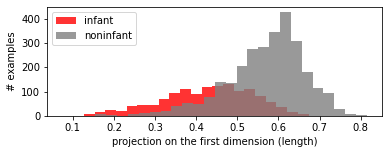

mean
[ 6.77876727 -8.45939051 -4.0431426  -1.59998935  1.81950639 -4.56012887
  0.14994965]


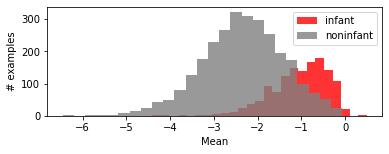

Fisher Linear Discriminant:
[ 6.77876727 -8.45939051 -4.0431426  -1.59998935  1.81950639 -4.56012887
  0.14994965]


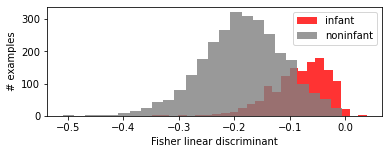

Fisher Linear Discriminant Expaned:
[  -4.01468835   -4.6826284   -14.35996719   11.49926088   11.49873145
  -36.08667533  -34.58295073   69.26468005 -104.92529194   22.27570596
  -42.67272128  -16.18602392   15.52762828   94.1835897    71.49580647
  -10.97170335  -33.49180523   36.09484867   69.84706399   -1.0074923
    3.98247235   80.59177985  -83.9451347   -80.76378563  -76.0344297
    3.75518732    9.76274662   20.94801957  -15.38429121  -10.95079824
  -22.88782657    6.71938041  -19.27552474   -2.56847762    9.18523462]


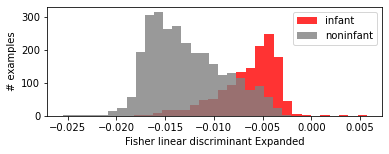

In [17]:
##### REPLACE BY YOUR CODE
%matplotlib inline
print('First dimension:')
print(objective(abalone.I,abalone.N,w1))
abalone.plot(w1,'projection on the first dimension (length)')
w2 = fisher(abalone.I,abalone.N)
print('mean')
print(objective(abalone.I,abalone.N,w2))
abalone.plot(w2,'Mean')
w3 = ComputeFisherLinearDiscriminant(abalone.I,abalone.N)
print('Fisher Linear Discriminant:')
print(objective(abalone.I,abalone.N,w3))
abalone.plot(w3/numpy.linalg.norm(w3),'Fisher linear discriminant')
w4 = ComputeFisherLinearDiscriminant(expand(abalone.I),expand(abalone.N))
print('Fisher Linear Discriminant Expaned:')
print(objective(expand(abalone.I),expand(abalone.N),w4))
abalone.I = expand(abalone.I)
abalone.N = expand(abalone.N)
abalone.plot(w4/numpy.linalg.norm(w4),'Fisher linear discriminant Expanded')
#####